# Titanic Data Explanatory Analysis (EDA):

## Data Cleaning:

In [1]:
# Import required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Inspect the dataframe to show a quick overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# extracts relevant information, including count, mean, min & max, standard deviation and 25%, 50%, 75% percentiles.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# There are too many decimals, let's round the values to 2 decimals
df_describe_round = df.describe().round(2)
df_describe_round

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [7]:
# Removing null (NaN) values from df. This will remove any rows that contain NaN values.
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
# Remove columns with NaN values
df = df.dropna(axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Correlation Analysis:

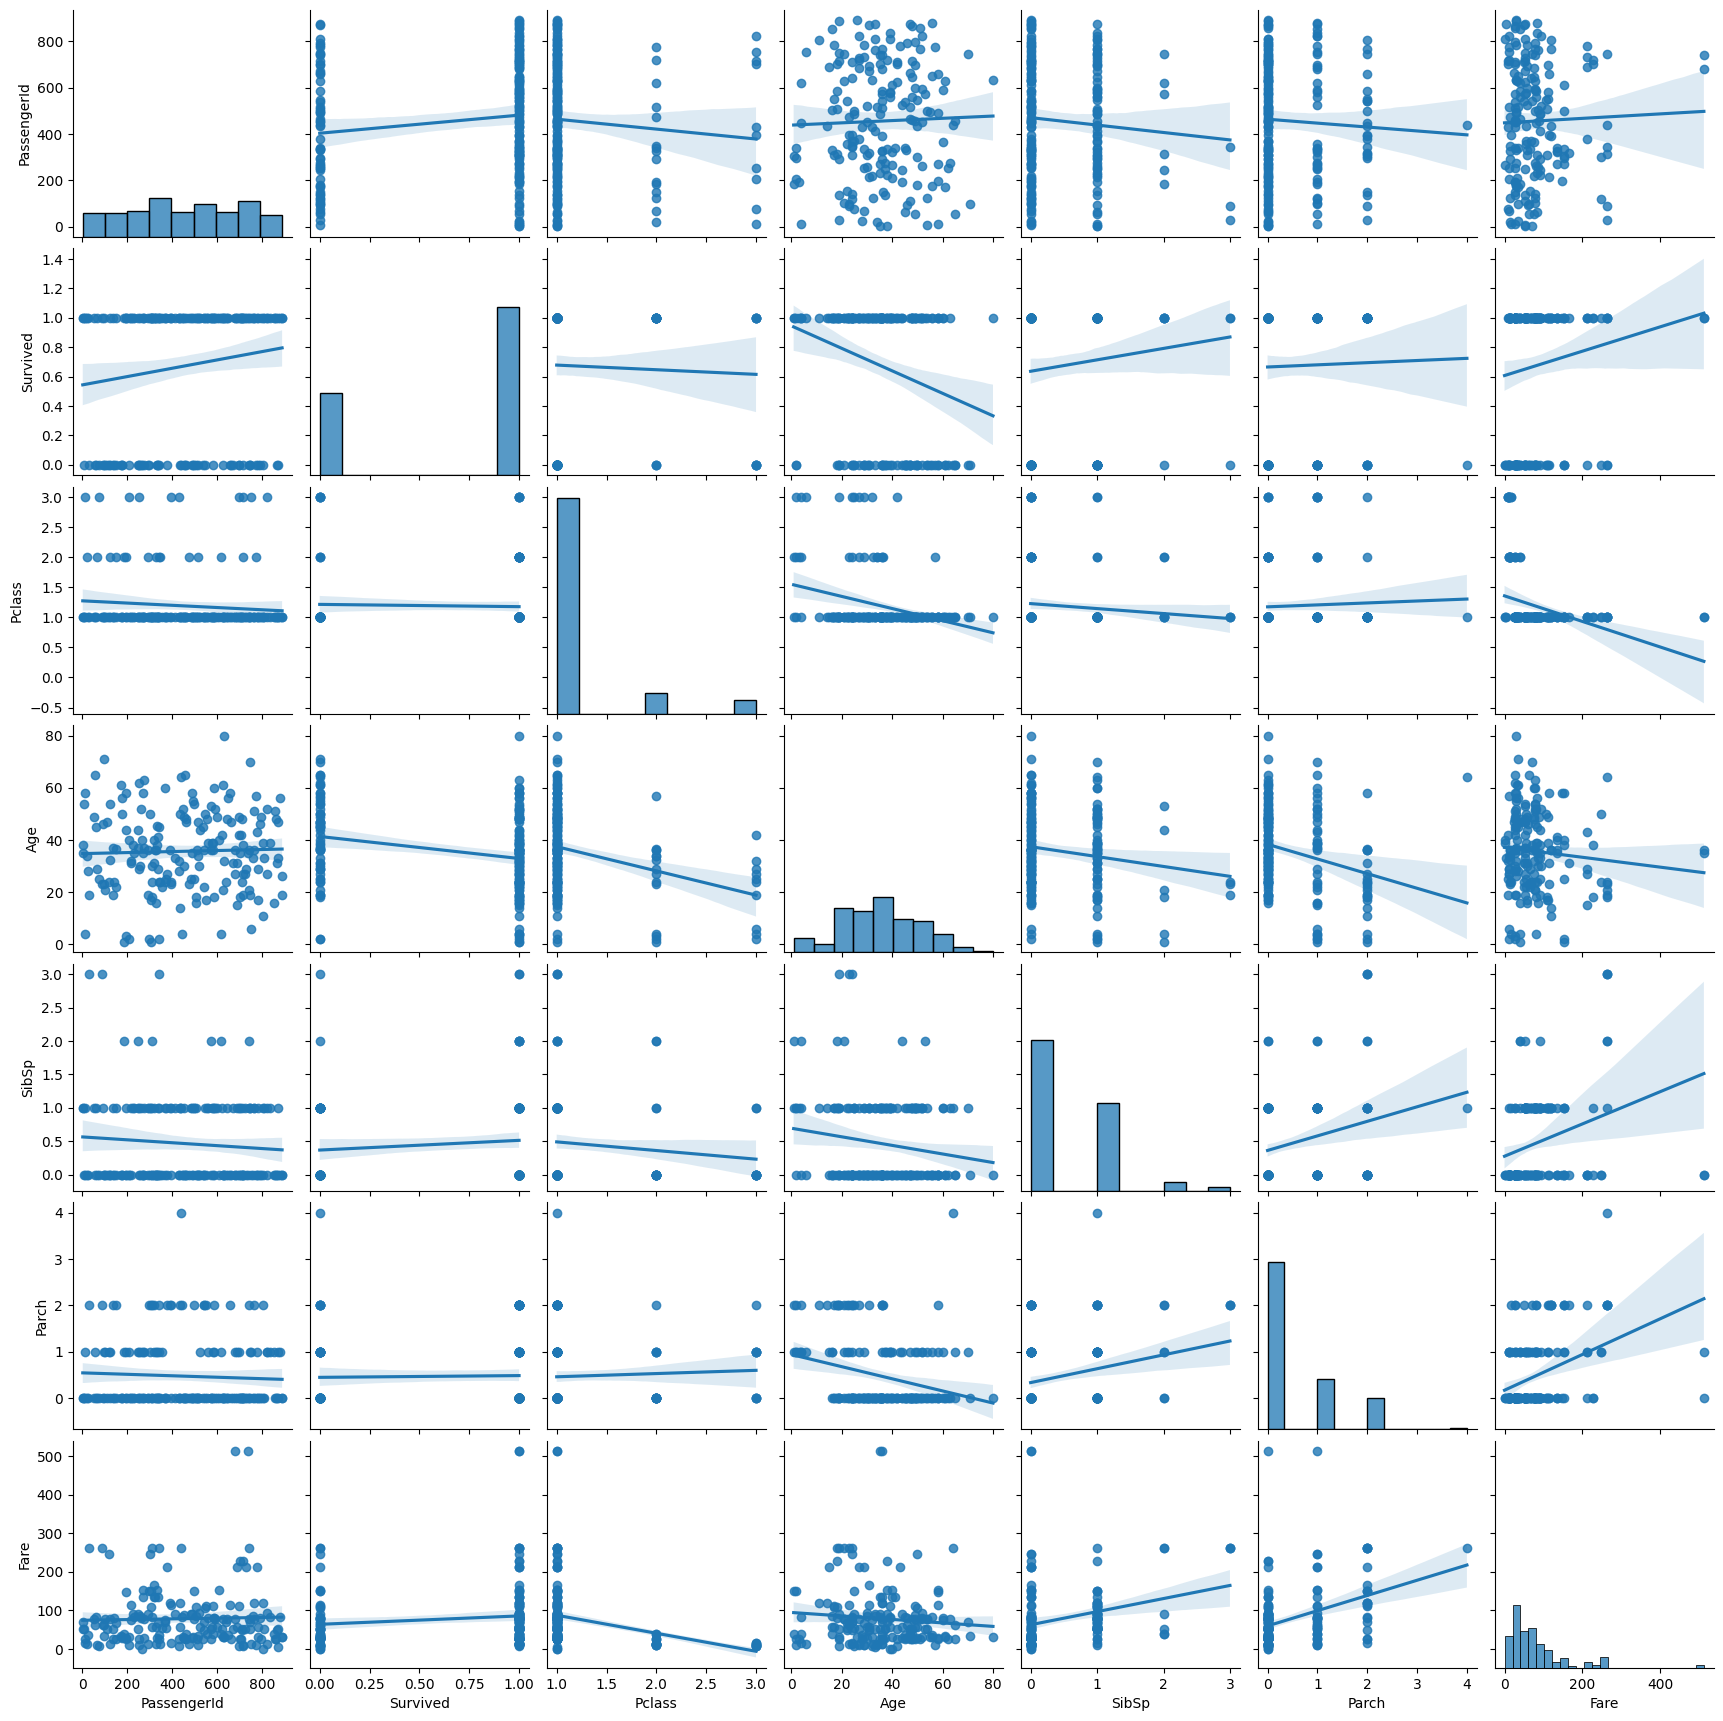

In [9]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Pairplot
sns.pairplot(df, kind = 'reg', palette = 'Set1')

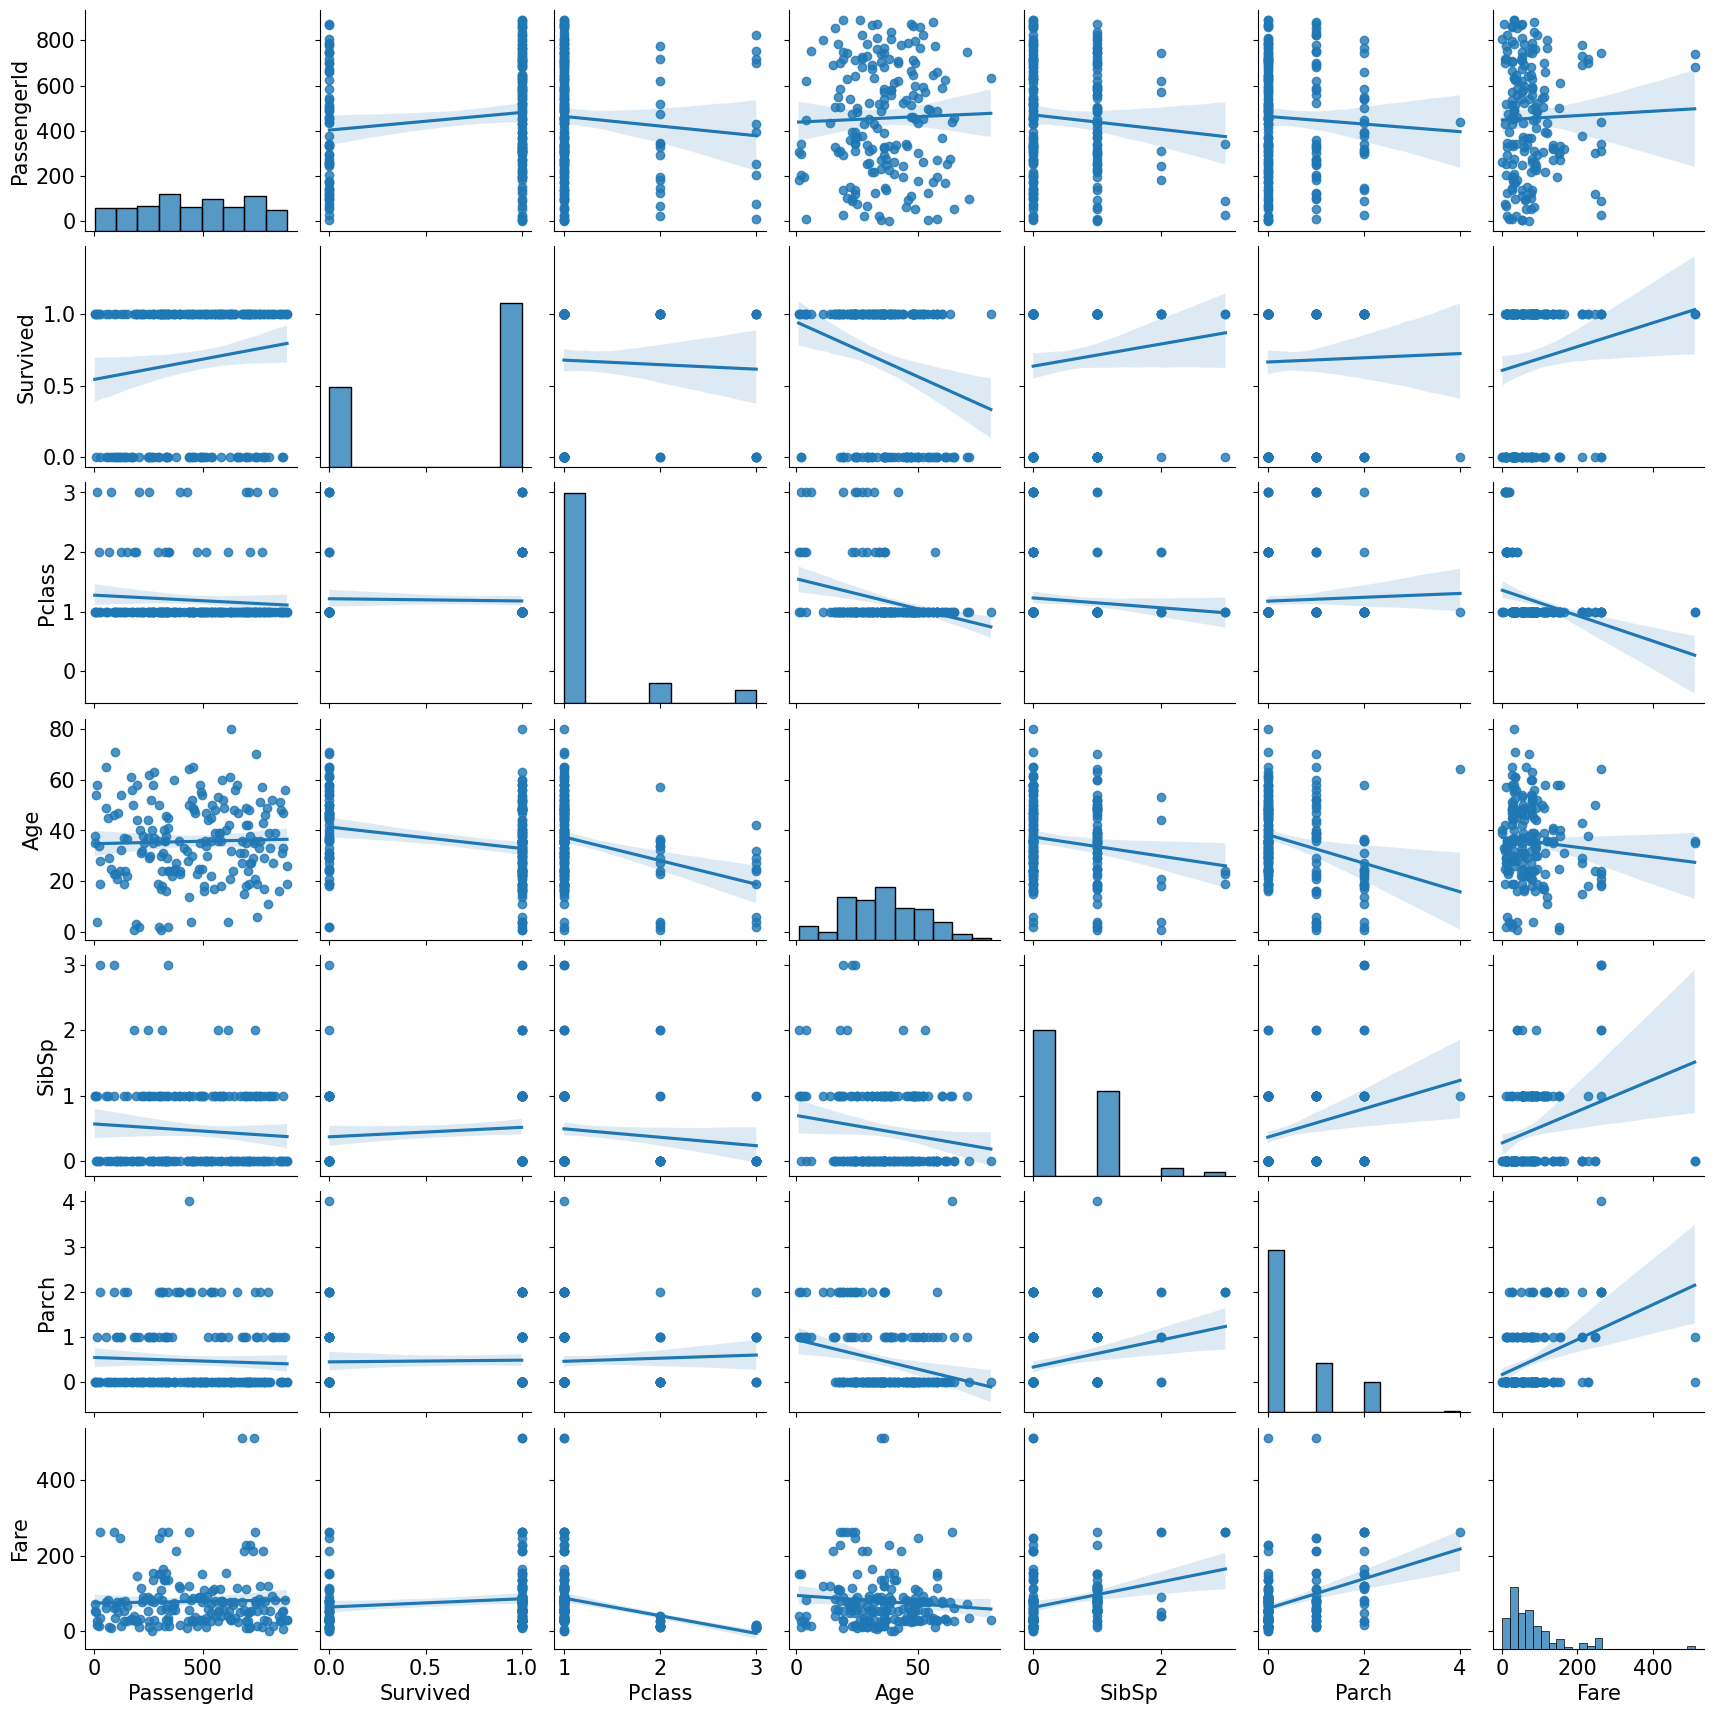

In [10]:
# Increasing the font size in the pairplot above
plt.rcParams.update({'font.size': 15})
sns.pairplot(df, kind='reg', palette = 'Set1')
plt.show()

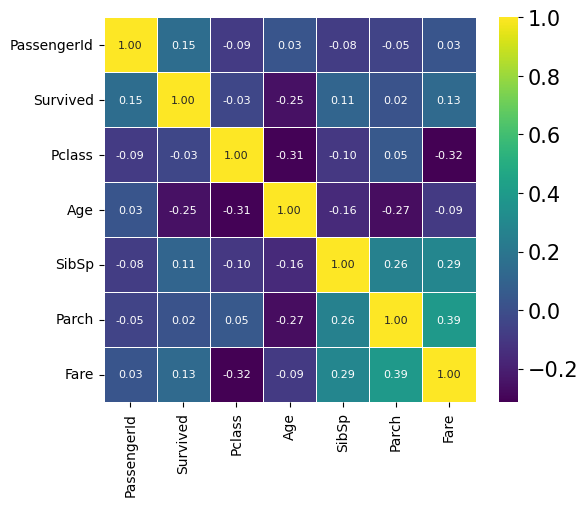

In [11]:
# Correlation matrix

# Label Encoding: Assigns a unique number to each category like gender.
df_encoded = pd.get_dummies(df, columns = ["Sex"])

# The .corr() method only works on numeric data, and it cannot convert strings (like names) to floats for correlation purposes.
# Select only numeric columns
numeric_df_encoded = df_encoded.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df_encoded.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(6, 5))  # Adjust figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", annot_kws={"size": 8})

# annot=True: This displays the correlation values inside the heatmap cells.
# cmap='coolwarm': This sets the color palette for the heatmap. You can try other palettes like 'viridis', 'plasma', or 'Blues'.
# linewidths=0.5: Adds space between the heatmap cells.
# fmt=".2f": Formats the values to 2 decimal places in the heatmap.

# Set font size for the column names and row indices
plt.xticks(fontsize=10)  # Change this value to adjust the size of column names
plt.yticks(fontsize=10)  # Change this value to adjust the size of row indices

# Show the plot
plt.show()


# Each cell in the matrix represents the correlation coefficient, which quantifies the degree to which two variables are linearly related. 
# Values close to 1 (in yellow) and -1 (in dark blue) respectively represent positive and negative correlations, and values close to 0 represent no correlation.

## Distribution Density Histograms

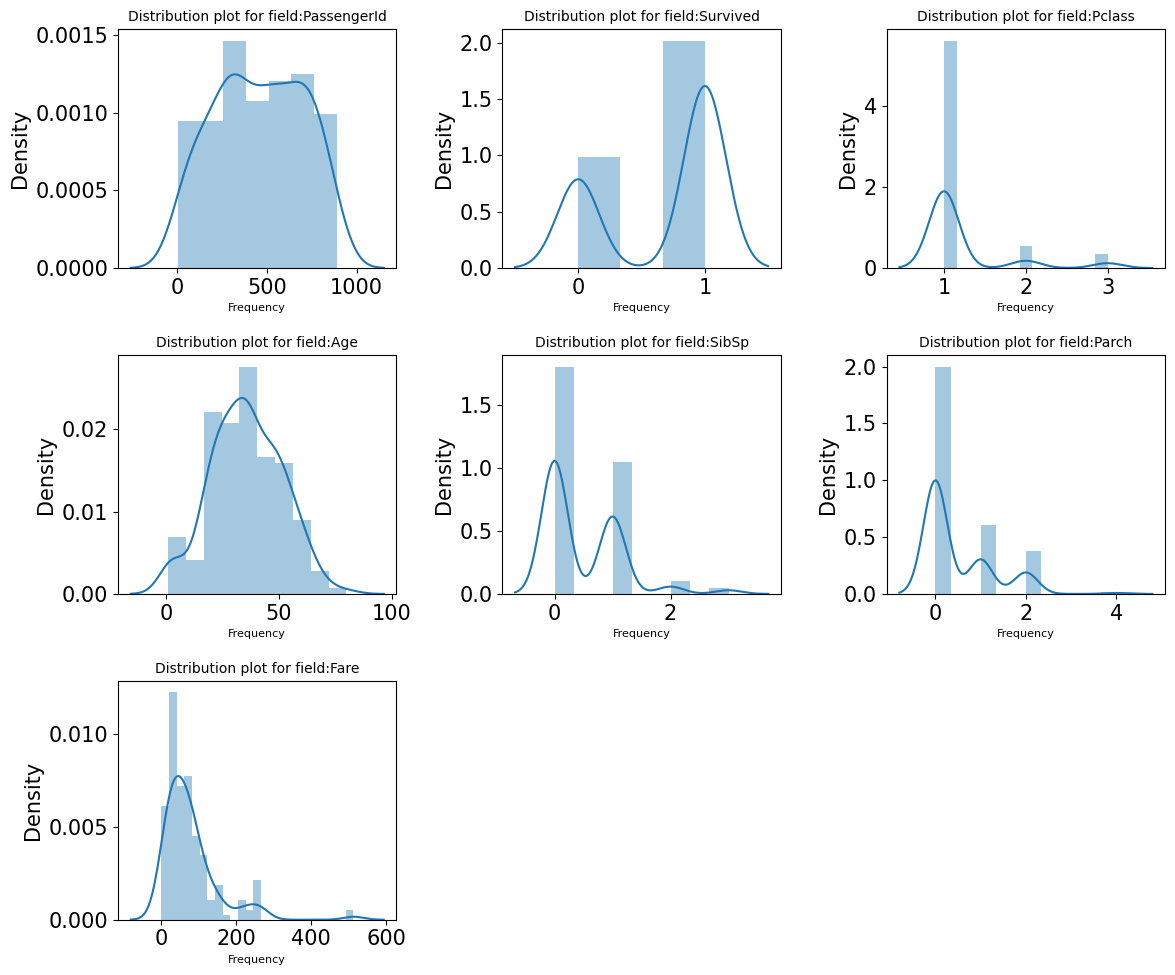

In [12]:
 # the distribution density of values for each column feature.

# Set the figure size for all subplots
plt.figure(figsize=(12, 10))  # Increase figure size


# Loop through the numeric columns to create distribution plots
for i, c in enumerate(numeric_df_encoded.select_dtypes(include='number').columns):
   plt.subplot(3,3,i+1) # Create a 3x3 grid of subplots
   sns.distplot(numeric_df_encoded[c], kde=True)  # Use sns.histplot for newer versions
   plt.title('Distribution plot for field:' + c, fontsize=10)
   plt.xlabel(c, fontsize=8)  # Smaller x-axis label font
   plt.xlabel('Frequency', fontsize=8)  # Smaller y-axis label font

# Save the figure instead of individual plots
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('./distribution_hist.png', dpi=300)  # Save the entire figure with high dpi

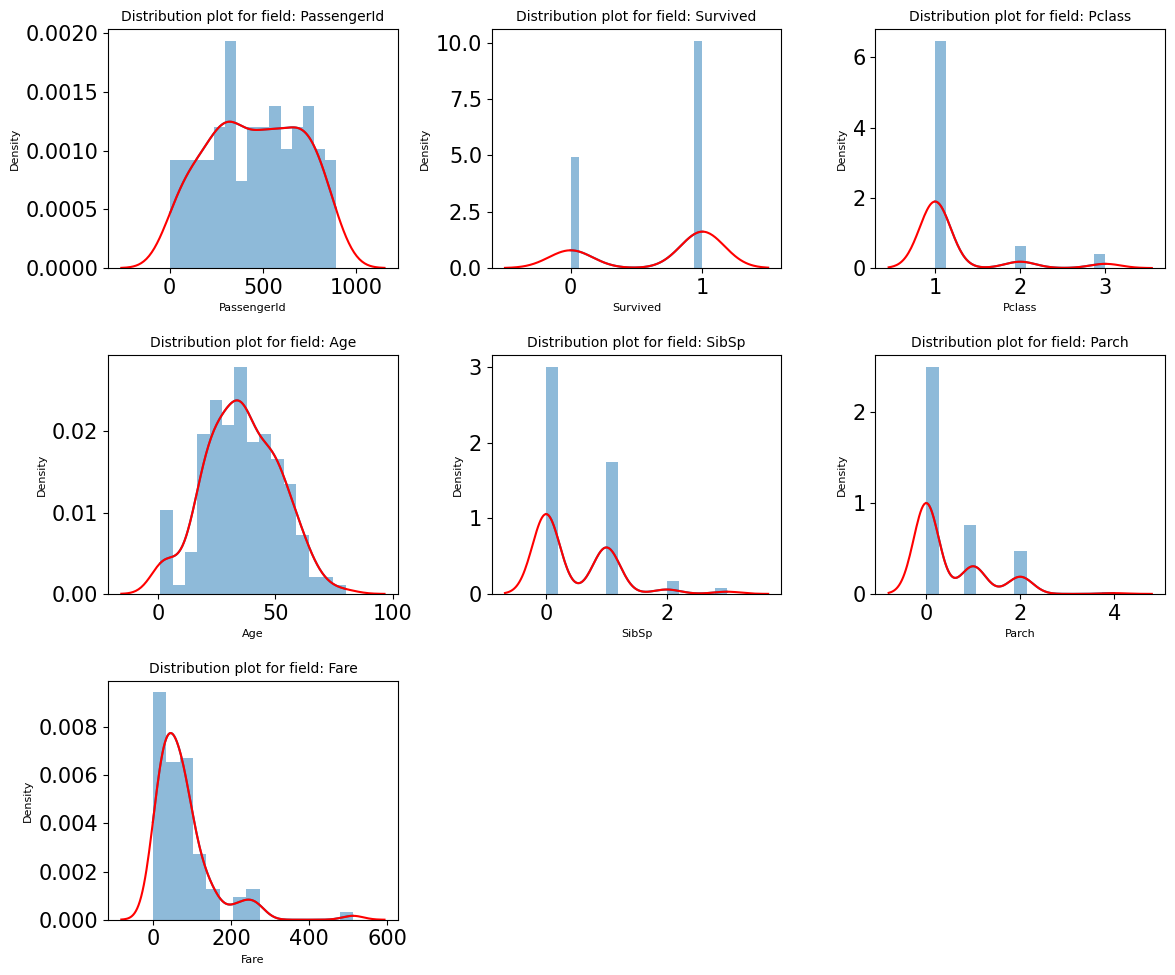

In [13]:
# Outliers: Identify any extreme values that may affect the mean and skewness.

# Plot using Kernel Density Estimate (KDE) Curve
# The peaks in the KDE can help identify modes (high-frequency values) in the data.

# Set the figure size for all subplots
plt.figure(figsize=(12, 10))  # Increase figure size

# Loop through the numeric columns to create distribution plots with KDE
for i, c in enumerate(numeric_df_encoded.select_dtypes(include='number').columns):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.histplot(numeric_df_encoded[c], kde=True, stat="density", linewidth=0, bins=15)  # Histogram with KDE
    sns.kdeplot(numeric_df_encoded[c], color='red', linewidth=1.5)  # Add KDE curve
    plt.title('Distribution plot for field: ' + c, fontsize=10)
    plt.xlabel(c, fontsize=8)  # Smaller x-axis label font
    plt.ylabel('Density', fontsize=8)  # Smaller y-axis label font

# Adjust layout for better spacing
plt.tight_layout()  # Ensure subplots fit into the figure area nicely
# Save the entire figure with high dpi
plt.savefig('./distribution_hist_with_kde.png', dpi=300)  
plt.show()  # Show the plots

## Outlier Detection:

In [14]:
# To further analyse the data distribution, it is advised to conduct a dedicated analysis to detect possible outliers in the data. 
# The Tukey IQR method identifies outliers as values with more than 1.5 times the interquartile range from the quartiles — either below Q1 − 1.5 IQR, or above Q3 + 1.5 IQR. 
# An example of the Tukey IQR method applied to the NDVI index is shown below:

# Define the function to find outliers using the Tukey method
def find_outliers_tukey(x):
    # Check if x is empty
    if x.empty:
        return [], []

    q1 = np.percentile(x, 25)  # First quartile (25th percentile)
    q3 = np.percentile(x, 75)  # Third quartile (75th percentile)
    iqr = q3 - q1  # Interquartile range
    floor = q1 - 1.5 * iqr  # Lower bound for outliers
    ceiling = q3 + 1.5 * iqr  # Upper bound for outliers
    
    # Identify indices of outliers
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

# Identify outliers in the 'Fare' column
tukey_indices, tukey_values = find_outliers_tukey(numeric_df_encoded['Fare'])

# Output the results
print("Outlier Indices:", tukey_indices)
print("Outlier Values:", tukey_values)

Outlier Indices: [27, 88, 118, 299, 311, 341, 377, 438, 679, 689, 700, 716, 730, 737, 742, 779]
Outlier Values: [263.0, 263.0, 247.5208, 247.5208, 262.375, 263.0, 211.5, 263.0, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375]


## Feature engineering and dimensionality reduction:

Future engineering can be used when the available features are not enough for training an ML model, for example when a small number of features is available, or it is not representative enough. In such cases, feature engineering can be used to increase and/or improve the dataframe representativeness. In this case it was used the PolynomialFeatures function from the sklearn library to increase the number of overall features through an iterative combination of the available features. For an algorithm like a Random Forest where decisions are being made, adding more features through feature engineering could provide a substantial improvement. Algorithms like convolutional neural networks however, might not need these since they can extract patterns directly out of the data.

In [15]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
new_df = pd.DataFrame(poly.fit_transform(numeric_df_encoded))
new_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,2.0,2.0,76.0,...,38.0,1.0,0.0,71.2833,38.0,0.0,2708.7654,0.0,71.2833,0.0000
1,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,4.0,4.0,140.0,...,35.0,1.0,0.0,53.1000,35.0,0.0,1858.5000,0.0,53.1000,0.0000
2,7.0,0.0,1.0,54.0,0.0,0.0,51.8625,0.0,7.0,378.0,...,54.0,0.0,0.0,51.8625,0.0,0.0,2800.5750,0.0,0.0000,0.0000
3,11.0,1.0,3.0,4.0,1.0,1.0,16.7000,11.0,33.0,44.0,...,12.0,3.0,3.0,50.1000,4.0,4.0,66.8000,1.0,16.7000,16.7000
4,12.0,1.0,1.0,58.0,0.0,0.0,26.5500,12.0,12.0,696.0,...,58.0,0.0,0.0,26.5500,0.0,0.0,1539.9000,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,872.0,1.0,1.0,47.0,1.0,1.0,52.5542,872.0,872.0,40984.0,...,47.0,1.0,1.0,52.5542,47.0,47.0,2470.0474,1.0,52.5542,52.5542
179,873.0,0.0,1.0,33.0,0.0,0.0,5.0000,0.0,873.0,28809.0,...,33.0,0.0,0.0,5.0000,0.0,0.0,165.0000,0.0,0.0000,0.0000
180,880.0,1.0,1.0,56.0,0.0,1.0,83.1583,880.0,880.0,49280.0,...,56.0,0.0,1.0,83.1583,0.0,56.0,4656.8648,0.0,0.0000,83.1583
181,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,888.0,888.0,16872.0,...,19.0,0.0,0.0,30.0000,0.0,0.0,570.0000,0.0,0.0000,0.0000


On the other hand, Principal Component Analysis (PCA) is a technique that transforms a dataset of many features into fewer, principal components that best summarise the variance that underlies the data. This can be used to extract the principal components from each feature so they can be used in training. PCA is also a function offered by the sklearn Python library.

In [16]:
pca = PCA(n_components=len(new_df.columns))
X_pca = pd.DataFrame(pca.fit_transform(new_df))

Fit: It computes the principal components based on the covariance of the data.

Transform: It projects the original data onto these principal components, resulting in a new DataFrame (X_pca) that contains the transformed features.

In [17]:
# Explained Variance:

print(pca.explained_variance_ratio_)
# This will give you an array of values where each value corresponds to the proportion of variance explained by each principal component. Summing these values should give you 1 (or very close to it).

[9.45201394e-01 5.32641227e-02 1.37213236e-03 6.21476885e-05
 3.94811759e-05 3.01441427e-05 2.09711869e-05 5.25672812e-06
 2.62405560e-06 9.28669850e-07 4.07017579e-07 2.02245396e-07
 5.35339342e-08 4.91288047e-08 4.31530797e-08 3.05275642e-08
 8.95611998e-09 2.81102553e-09 7.61224625e-11 4.97985258e-11
 4.10454870e-11 2.69954317e-11 2.15076995e-11 1.78521314e-11
 6.44800142e-12 4.00788555e-12 2.15586132e-12 1.43798863e-12]


In [18]:
# Cumulative Explained Variance:
# If you want to see how many principal components are needed to explain a certain percentage of the variance, calculate the cumulative explained variance:


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)


[0.94520139 0.99846552 0.99983765 0.9998998  0.99993928 0.99996942
 0.99999039 0.99999565 0.99999827 0.9999992  0.99999961 0.99999981
 0.99999987 0.99999991 0.99999996 0.99999999 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


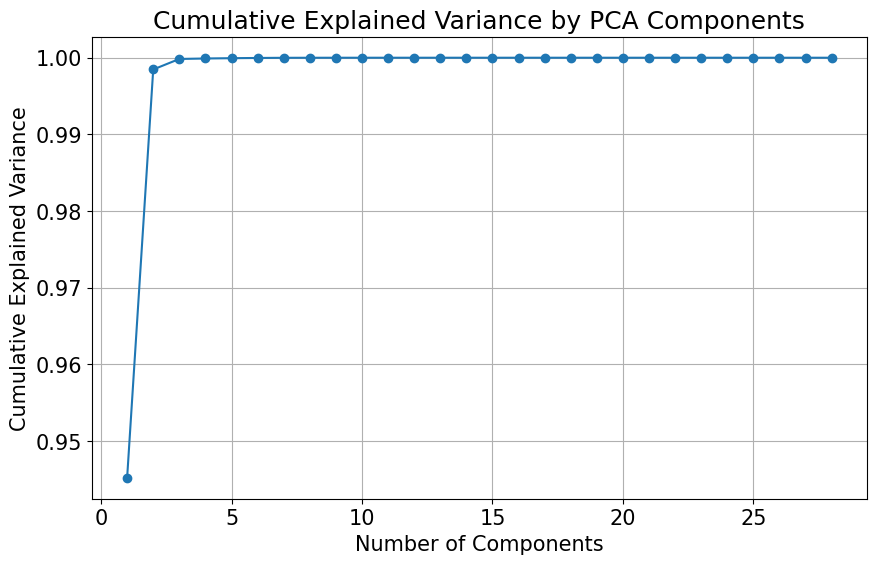

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


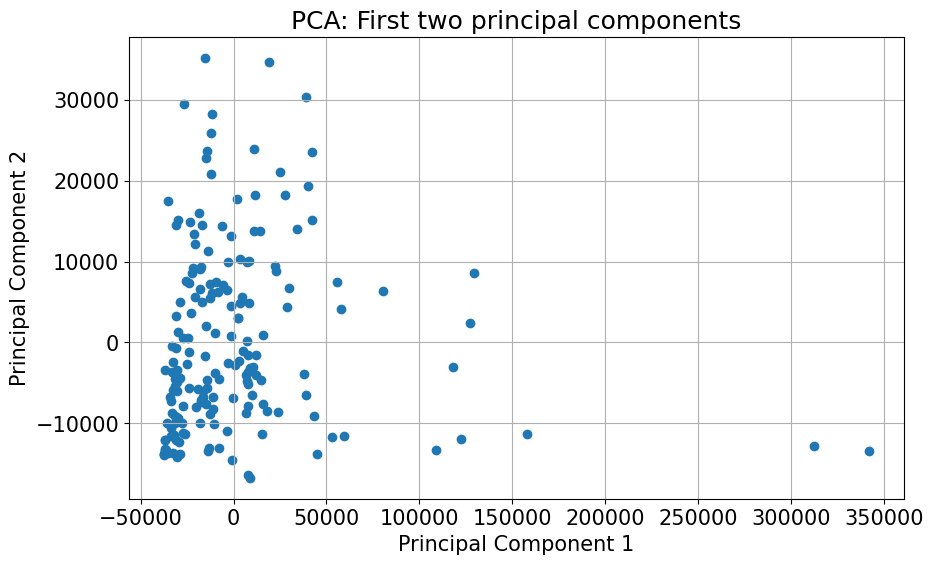

In [20]:
# Dimensionality Reduction:
# You can visualize the first two or three principal components to understand how the data is distributed in the reduced space:

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[0], X_pca[1])
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


### Clustering using PCA:

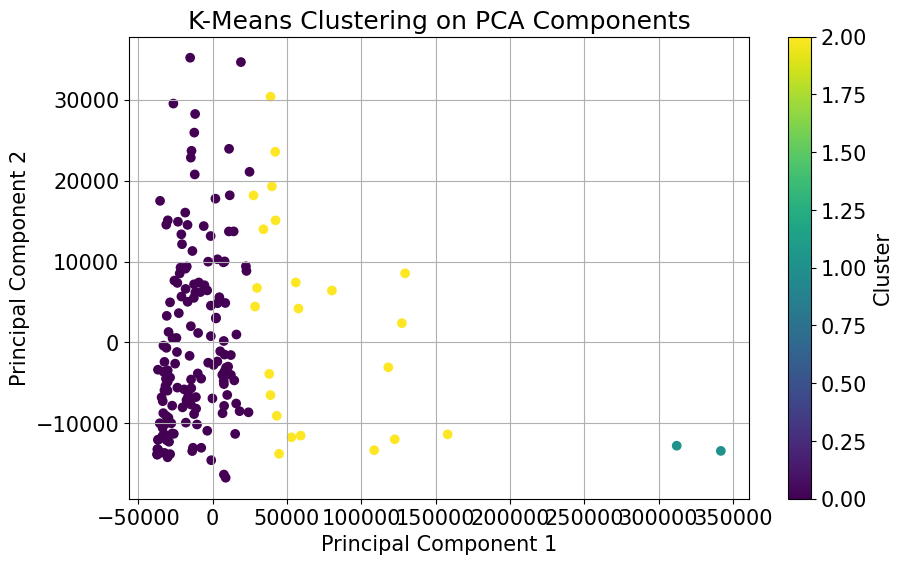

In [21]:
from sklearn.cluster import KMeans

#You can use clustering algorithms on the PCA-transformed data to identify groups within your dataset.

# Choose the number of clusters (k)
k = 3  # You can adjust this value based on your analysis

# Fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the PCA DataFrame
X_pca['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[0], X_pca[1], c=X_pca['Cluster'], cmap='viridis')
plt.title('K-Means Clustering on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


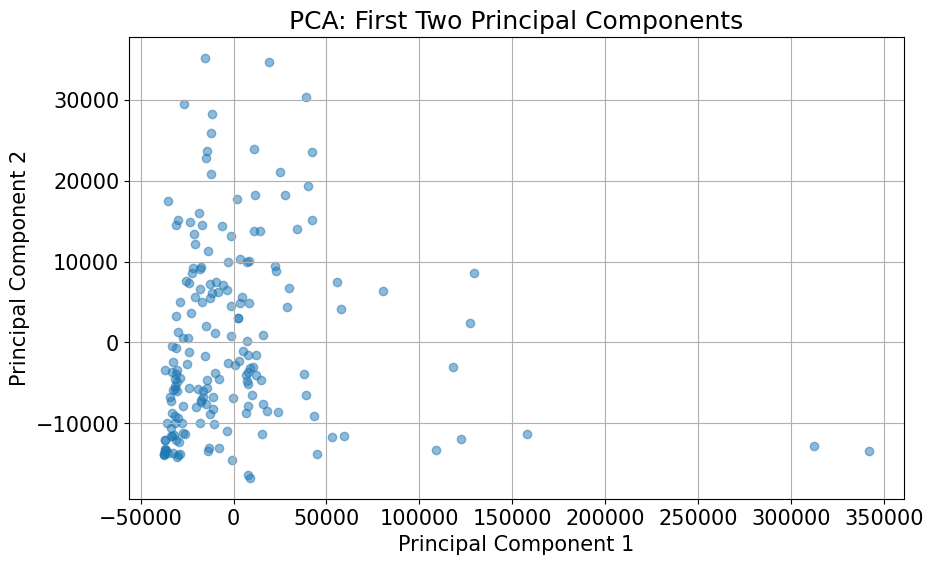

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[0], X_pca[1], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


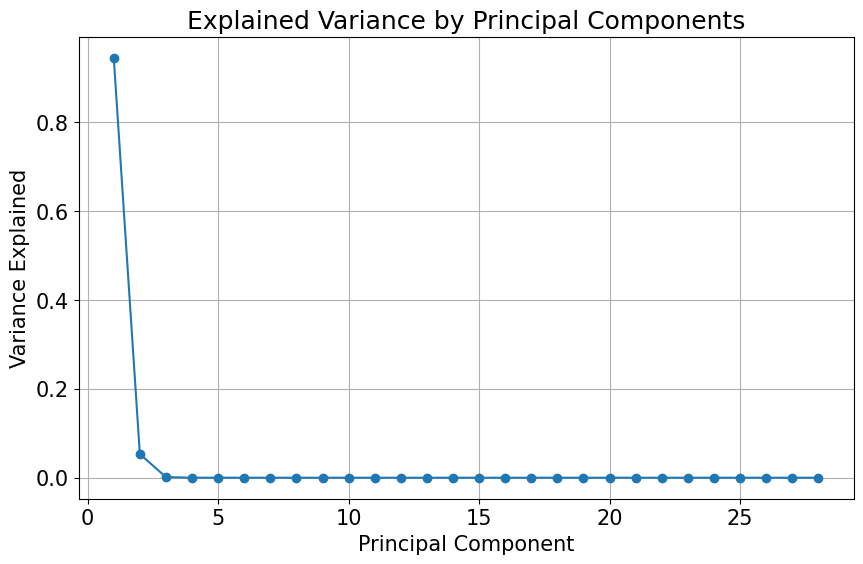

In [23]:
# Analyzing Explained Variance

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()


In [24]:
# Feature Importance Analysis

# Get the loading scores (how much each original feature contributes to each component)
loadings = pd.DataFrame(pca.components_.T, index=new_df.columns, columns=[f'PC{i+1}' for i in range(len(new_df.columns))])

# Display loadings for the first two components
print(loadings[['PC1', 'PC2']])


             PC1       PC2
0   2.070129e-03  0.014606
1   1.857649e-06 -0.000003
2  -2.594131e-06 -0.000006
3  -1.244089e-05  0.000841
4   1.243197e-06 -0.000007
5   3.606172e-06 -0.000015
6   1.327865e-03 -0.001778
7   2.427793e-03  0.007427
8   1.114807e-03  0.014746
9   6.677375e-02  0.997495
10  1.568917e-03  0.003730
11  2.861167e-03 -0.000799
12  9.967644e-01 -0.066945
13  2.684126e-07 -0.000009
14  6.389938e-05  0.000496
15  1.323841e-06 -0.000005
16  2.859777e-06 -0.000012
17  1.304513e-03 -0.001515
18 -7.200260e-05  0.000842
19  5.590405e-07 -0.000012
20  2.166998e-06 -0.000022
21  1.292301e-03 -0.001916
22  4.138005e-05  0.000296
23  1.496578e-04  0.000136
24  4.442080e-02  0.001439
25  3.580432e-06 -0.000017
26  4.310540e-04 -0.001952
27  1.183168e-03 -0.002408


### Classification using PCA:

**Note that in this example to show how to use PCA, I split the train.csv file in kaggle and didn't use the test.csv set.**

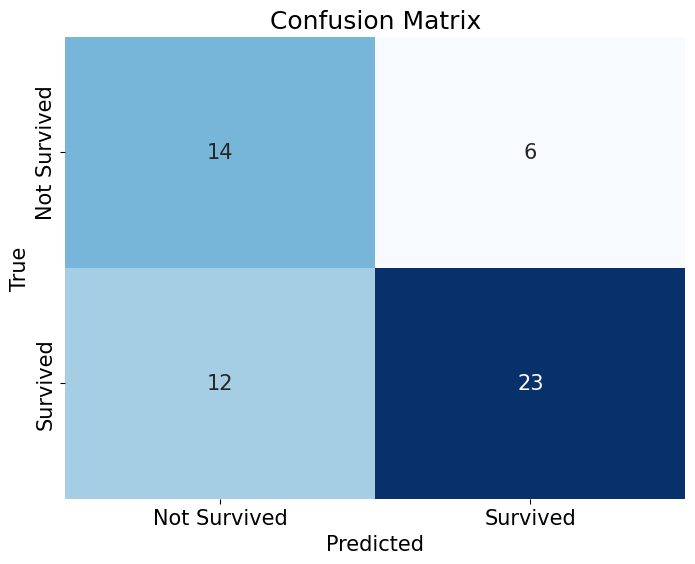

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        20
           1       0.79      0.66      0.72        35

    accuracy                           0.67        55
   macro avg       0.67      0.68      0.66        55
weighted avg       0.70      0.67      0.68        55



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Preprocess the features
new_df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Replace with your actual features

# Convert 'Sex' to a numeric format
new_df = pd.get_dummies(new_df, columns=['Sex'], drop_first=True)

# Handle missing values (drop or fill)
new_df = new_df.dropna()  # Dropping rows with NaN values for simplicity

# Define the target variable
target = df['Survived'][new_df.index]  # Align target with new_df after dropping NaN values

# Standardize the data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df)

# Apply PCA
pca = PCA(n_components=len(new_df.columns))  # You can choose a smaller number of components if desired
X_pca = pca.fit_transform(X_scaled)

# Convert PCA output to DataFrame for easier handling
X_pca_df = pd.DataFrame(X_pca)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, target, test_size=0.3, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if necessary
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model and create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

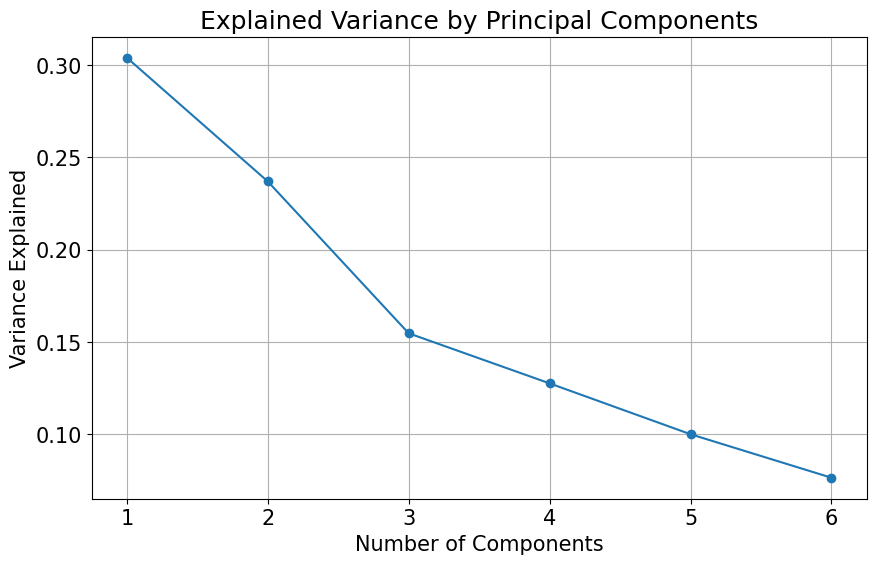

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()
